In [ ]:
%matplotlib inline
# from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


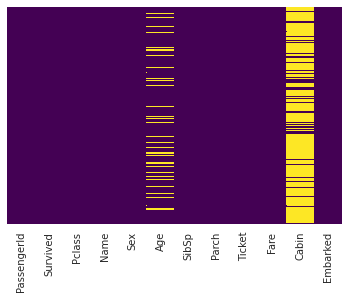

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False,cmap = "viridis")

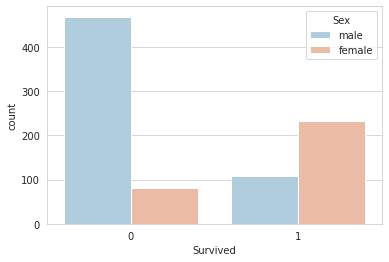

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

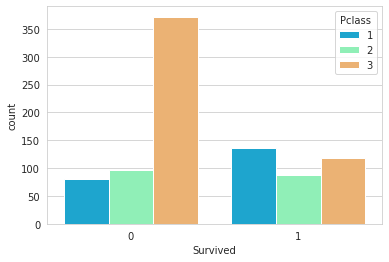

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


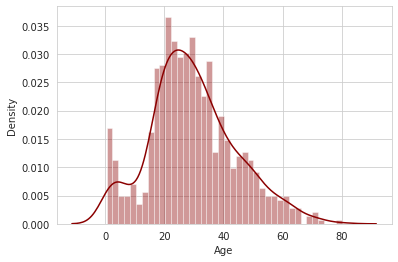

In [ ]:
sns.distplot(train['Age'].dropna(),kde = True, color = 'darkred',bins = 40)

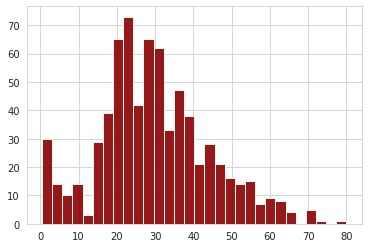

In [ ]:
train['Age'].hist(bins = 30, color = 'darkred',alpha = 0.9)

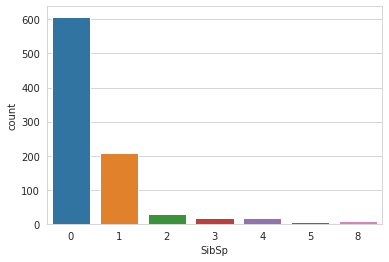

In [ ]:
sns.countplot(x = 'SibSp', data = train)

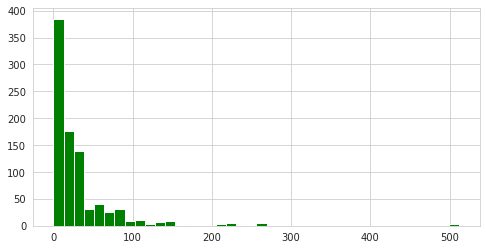

In [ ]:
train['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

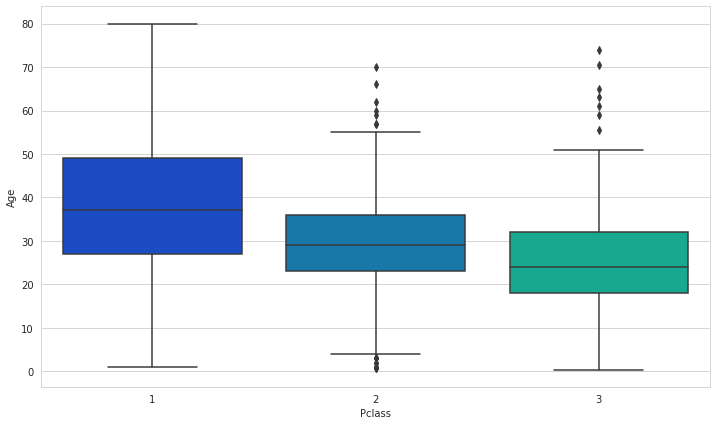

In [ ]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [ ]:
def insertValue_na(colsarr):
    Age = colsarr[0]
    Pclass = colsarr[1]

    if pd.isnull(Age):
        if Pclass == 1:
          return 38
        elif Pclass == 2:
          return 29
        else:
          return 23

    else:      
      return Age

        




In [ ]:
train.drop('Cabin', axis = 1, inplace = True) ## inplace change dataframe and return nothing

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(insertValue_na, axis = 1)

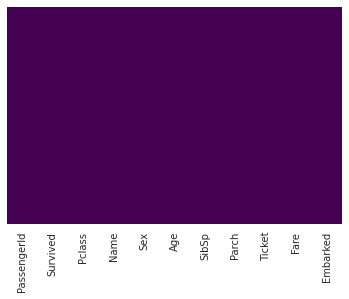

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False,cmap = "viridis")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
pd.get_dummies(train['Embarked'], drop_first = False).head()##drop_first = True means it will remove the first column which is created for the first unique value of a column

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
pd.get_dummies(train['Sex'], drop_first = False).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket','Fare'],axis = 1,inplace = True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [ ]:
train = pd.concat([train,sex,embark],axis = 1)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [ ]:
# for i in range(len(train)):
#   arr = np.append([[]],axis = 0)

In [ ]:
# arr = np.loadtxt(train[:1],delimiter=",",dtype= str)
train.iloc[1] ## take feature from its index

Survived     1.0
Pclass       1.0
Age         38.0
SibSp        1.0
Parch        0.0
male         0.0
Q            0.0
S            0.0
Name: 1, dtype: float64

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [ ]:
arr = np.array([train['Pclass'],train['Age'],train['male'],train['SibSp'],train['Q'],train['S']])

In [ ]:
arr = [[train['Pclass'][0],train['Age'][0],train['male'][0],train['SibSp'][0],train['Q'][0],train['S'][0]]]
for i in range(1,len(train)):
  arr = np.append(arr,[[train['Pclass'][i],train['Age'][i],train['male'][i],train['SibSp'][i],train['Q'][i],train['S'][i]]],axis = 0)

In [ ]:
print(arr)

[[ 3. 22.  1.  1.  0.  1.]
 [ 1. 38.  0.  1.  0.  0.]
 [ 3. 26.  0.  0.  0.  1.]
 ...
 [ 3. 23.  0.  1.  0.  1.]
 [ 1. 26.  1.  0.  0.  0.]
 [ 3. 32.  1.  0.  1.  0.]]


In [ ]:
arr_mean = arr - np.mean(arr, axis = 0)

In [ ]:
print(arr_mean)

[[ 0.69135802 -6.94744108  0.35241302  0.47699214 -0.08641975  0.27721661]
 [-1.30864198  9.05255892 -0.64758698  0.47699214 -0.08641975 -0.72278339]
 [ 0.69135802 -2.94744108 -0.64758698 -0.52300786 -0.08641975  0.27721661]
 ...
 [ 0.69135802 -5.94744108 -0.64758698  0.47699214 -0.08641975  0.27721661]
 [-1.30864198 -2.94744108  0.35241302 -0.52300786 -0.08641975 -0.72278339]
 [ 0.69135802  3.05255892  0.35241302 -0.52300786  0.91358025 -0.72278339]]


In [ ]:
cov_matrix = np.cov(arr_mean, rowvar = False)# If rowvar is True (default), then each row represents a variable, with observations in the columns

In [ ]:
print(cov_matrix)

[[ 6.99015120e-01 -4.67308573e+00  5.27118879e-02  7.65986961e-02
   5.19489527e-02  3.06006381e-02]
 [-4.67308573e+00  1.77673206e+02  4.91569099e-01 -3.59335679e+00
  -3.47699958e-01  8.26943215e-02]
 [ 5.27118879e-02  4.91569099e-01  2.28474508e-01 -6.04219473e-02
  -9.95977251e-03  2.69145891e-02]
 [ 7.65986961e-02 -3.59335679e+00 -6.04219473e-02  1.21604308e+00
  -8.17034263e-03  3.50370118e-02]
 [ 5.19489527e-02 -3.47699958e-01 -9.95977251e-03 -8.17034263e-03
   7.90400888e-02 -6.25329449e-02]
 [ 3.06006381e-02  8.26943215e-02  2.69145891e-02  3.50370118e-02
  -6.25329449e-02  2.00592693e-01]]


In [ ]:
eigenValue, eigenVector = np.linalg.eigh(cov_matrix)

In [ ]:
print(eigenValue)

[4.68889869e-02 1.90857752e-01 2.46431234e-01 5.92415416e-01
 1.14805915e+00 1.77871719e+02]


In [ ]:
print( eigenVector)

[[ 1.01223384e-01  1.01405675e-01 -1.49661820e-01 -9.77212171e-01
   3.78559785e-02  2.63695609e-02]
 [ 1.13804569e-03  2.76571618e-03 -6.67396803e-03 -2.62935210e-02
  -1.93909766e-02 -9.99439420e-01]
 [-2.47259892e-02 -7.65159701e-01  6.16753000e-01 -1.74323254e-01
   5.60245698e-02 -2.76489262e-03]
 [ 8.49653231e-04 -6.49974247e-02 -2.50607659e-03 -4.43345605e-02
  -9.96689014e-01  2.03418163e-02]
 [-9.15317459e-01 -2.20164570e-01 -3.30167343e-01 -6.63659491e-02
   1.73996708e-02  1.96163801e-03]
 [-3.89017202e-01  5.92910422e-01  6.98681457e-01 -8.72148803e-02
  -3.68839294e-02 -4.57730007e-04]]


In [ ]:
sorted_index_des = np.argsort(eigenValue)[::-1]

In [ ]:
print(sorted_index_des)

[5 4 3 2 1 0]


In [ ]:
sorted_eigenvalue = eigenValue[sorted_index_des]

sorted_eigenvector = eigenVector[:,sorted_index_des]

In [ ]:
print(sorted_eigenvalue)

[1.77871719e+02 1.14805915e+00 5.92415416e-01 2.46431234e-01
 1.90857752e-01 4.68889869e-02]


In [ ]:
print(sorted_eigenvector)

[[ 2.63695609e-02  3.78559785e-02 -9.77212171e-01 -1.49661820e-01
   1.01405675e-01  1.01223384e-01]
 [-9.99439420e-01 -1.93909766e-02 -2.62935210e-02 -6.67396803e-03
   2.76571618e-03  1.13804569e-03]
 [-2.76489262e-03  5.60245698e-02 -1.74323254e-01  6.16753000e-01
  -7.65159701e-01 -2.47259892e-02]
 [ 2.03418163e-02 -9.96689014e-01 -4.43345605e-02 -2.50607659e-03
  -6.49974247e-02  8.49653231e-04]
 [ 1.96163801e-03  1.73996708e-02 -6.63659491e-02 -3.30167343e-01
  -2.20164570e-01 -9.15317459e-01]
 [-4.57730007e-04 -3.68839294e-02 -8.72148803e-02  6.98681457e-01
   5.92910422e-01 -3.89017202e-01]]


In [ ]:
n_component = 3
eigenVectorSubset = sorted_eigenvector[:,0:n_component]

In [ ]:
print(eigenVectorSubset)

[[ 2.63695609e-02  3.78559785e-02 -9.77212171e-01]
 [-9.99439420e-01 -1.93909766e-02 -2.62935210e-02]
 [-2.76489262e-03  5.60245698e-02 -1.74323254e-01]
 [ 2.03418163e-02 -9.96689014e-01 -4.43345605e-02]
 [ 1.96163801e-03  1.73996708e-02 -6.63659491e-02]
 [-4.57730007e-04 -3.68839294e-02 -8.72148803e-02]]


In [ ]:
reduced_dimension = np.dot(eigenVectorSubset.transpose(),arr_mean.transpose()).transpose() ## here we reduced the result from higher dimension to lower dimension


In [ ]:
print(reduced_dimension)

[[ 6.97020938 -0.30650785 -0.59395389]
 [-9.07033784 -0.71161608  1.20131225]
 [ 2.95487477  0.55659268 -0.48047016]
 ...
 [ 5.97353485 -0.3819234  -0.44592416]
 [ 2.89982849  0.57378923  1.3868458 ]
 [-3.04210727  0.550555   -0.79170561]]


In [ ]:
principal_df = pd.DataFrame(reduced_dimension , columns = ['PC1','PC2','PC3'])

In [ ]:
print(train)

     Survived  Pclass   Age  SibSp  Parch  male  Q  S
0           0       3  22.0      1      0     1  0  1
1           1       1  38.0      1      0     0  0  0
2           1       3  26.0      0      0     0  0  1
3           1       1  35.0      1      0     0  0  1
4           0       3  35.0      0      0     1  0  1
..        ...     ...   ...    ...    ...   ... .. ..
886         0       2  27.0      0      0     1  0  1
887         1       1  19.0      0      0     0  0  1
888         0       3  23.0      1      2     0  0  1
889         1       1  26.0      0      0     1  0  0
890         0       3  32.0      0      0     1  1  0

[891 rows x 8 columns]


In [ ]:
print(principal_df)

          PC1       PC2       PC3
0    6.970209 -0.306508 -0.593954
1   -9.070338 -0.711616  1.201312
2    2.954875  0.556593 -0.480470
3   -6.072477 -0.690327  1.192978
4   -6.042845  0.438098 -0.891435
..        ...       ...       ...
886  1.926301  0.555370  0.296125
887  9.898212  0.616618  1.658009
888  5.973535 -0.381923 -0.445924
889  2.899828  0.573789  1.386846
890 -3.042107  0.550555 -0.791706

[891 rows x 3 columns]


In [ ]:
# plt.figure(figsize = (6,6))
# sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , z = 'PC3', hue = 'Survived' , s = 60 , palette= 'icefire')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(principal_df,train['Survived'], test_size = 0.27, random_state = 101)

In [ ]:
logistic_Model = LogisticRegression()
logistic_Model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
prediction = logistic_Model.predict(X_test)

In [ ]:
print(prediction)

[1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model_accuracy = confusion_matrix(Y_test,prediction)

In [ ]:
print(model_accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(Y_test,prediction )

In [ ]:
print(accuracy)

0.6970954356846473


In [ ]:
#####################################     FOR TESTING WHETHER MY PCA IS RIGHT OR WRONG

In [ ]:
from sklearn.decomposition import PCA
model=PCA(3)
df_pca=model.fit_transform(train.drop(['Survived'],axis=1))

In [ ]:
df_pca.shape

(891, 3)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_pca,train['Survived'], test_size = 0.30, random_state = 101)

In [ ]:
logistic_Model = LogisticRegression()
logistic_Model.fit(X_train, Y_train)
logistic_Model.score(X_test,Y_test)

0.7126865671641791